# Capstone Project - The Battle of Neighborhoods

In this project I will use location data to explore a geographical location, and use Data Science technique like Clustering and Visualization to solve the problem I defined below.

## Problem

In this project I will answer one question: 'Where is the proper location to open a restaurant in Delhi?'

## Data

Main data is from two sources:

1. List of districts and neighborhoods in Delhi from Wikipedia (https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi)
2. Foursquare

## Prepare data

Firstly, load necessary libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


The list of districts and neighborhoods in Delhi is from [Wikipedia](https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi), and the coordinates data is from [https://www.maps.ie/coordinates.html](https://www.maps.ie/coordinates.html). 

I create the `.csv` file manually.

Let's load and explore it.

In [2]:
link='https://raw.githubusercontent.com/Disp101/Coursera_Capstone/master/delhi.csv'
df = pd.read_csv(link,index_col=0)
df.head()

,Neighborhood,City,Latitude,Longitude
0,Adarsh Nagar,Delhi,28.720341,77.172661
1,Ashok Vihar,Delhi,28.690420,77.176064
2,Azadpur,Delhi,28.712420,77.173111
3,Bawana,Delhi,28.797661,77.045258
4,Begum Pur,Delhi,28.732599,77.052170


__Use geopy library to get the latitude and longitude values of Delhi, India___

In [3]:
address = 'Delhi , India'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


__Create a map of Delhi to visualize the neighbourhoods__

In [4]:
# create map of Delhi using latitude and longitude values
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

__Utilizing the Foursquare API to explore the neighborhoods and segment them__

In [5]:
# Define Foursquare Credentials and Version
LIMIT = 150

CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH' # your Foursquare ID
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG' # your Foursquare Secret
VERSION = '20180606' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('VERSION:' + VERSION)

Your credentails:
CLIENT_ID: ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH
CLIENT_SECRET:RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG
VERSION:20180606


# __Explore Neighborhoods in Delhi__

__Let's create a function to repeat the same process to all the neighborhoods in Delhi__

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

__Now write the code to run the above function on each neighborhood and create a new dataframe called delhi_venues__

In [7]:
delhi_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )



Adarsh Nagar
Ashok Vihar
Azadpur
Bawana
Begum Pur
Dhaka
Jahangirpuri
Karala
Keshav Puram
Kingsway Camp
Kohat Enclave
Model Town
Narela
Pitam Pura
Rani Bagh
Rithala
Rohini Sub City
Shalimar Bagh
Shakti Nagar
Bara Hindu Rao
Chandni Chowk
Chawri Bazaar
Civil Lines
Dariba Kalan
Ghantewala
Gulabi Bagh
Kamla Nagar
Kashmiri Gate
Kotwali
Lahori Gate
Nehru Vihar
Paharganj
Pratap Nagar
Pul Bangash
Roshanara Bagh
Sadar Bazaar
Sangam Vihar
Sant Nagar
Sarai Kale Khan
Sarai Rohilla
Shakti Nagar
Shastri Nagar
Tees Hazari
Timarpur
Wazirabad
Babarpur
Dilshad Garden
Kabir Nagar
Mandoli
Maujpur
Nand Nagri
Naveen Shahdara
New Usmanpur
Sadatpur
Shahdara
Sonia Vihar
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Bara Hindu Rao
Paharganj
Rajender Nagar
Sadar Bazaar
Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Laxmibai Nagar
Pragati Maidan
Brij Puri
East Vinod Nagar
Gandhi Nagar
Geeta Colony
Jhilmil Colony
Krishna Nagar
Laxmi N

__Glimspe of the new data set__

In [8]:
print(delhi_venues.shape)
delhi_venues.head()

(1113, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.720341,77.172661,Giani's,28.717900,77.173907,Ice Cream Shop
1,Adarsh Nagar,28.720341,77.172661,Sachdeva Foods,28.718744,77.175362,Sandwich Place
2,Adarsh Nagar,28.720341,77.172661,Urban kathi pacific mall,28.719115,77.176490,Indian Restaurant
3,Adarsh Nagar,28.720341,77.172661,Adarsh Nagar Metro Station,28.716598,77.170436,Light Rail Station
4,Ashok Vihar,28.690420,77.176064,Domino's Pizza,28.693000,77.177000,Pizza Place


__Let's check how many venues were returned for each neighborhood__

In [9]:
delhi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adarsh Nagar,4,4,4,4,4,4
Alaknanda,4,4,4,4,4,4
Ashok Nagar,6,6,6,6,6,6
Ashok Vihar,4,4,4,4,4,4
Azadpur,4,4,4,4,4,4
Babarpur,2,2,2,2,2,2
Badarpur,5,5,5,5,5,5
Bali Nagar,8,8,8,8,8,8
Bara Hindu Rao,6,6,6,6,6,6


In [10]:
delhi_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       126
Hotel                    55
Café                     55
Fast Food Restaurant     48
Coffee Shop              47
Market                   44
Bakery                   35
Pizza Place              31
Chinese Restaurant       29
Light Rail Station       27
Name: Neighborhood, dtype: int64

__Let's find out how many unique categories can be curated from all the returned venues__

In [11]:
print('There are {} uniques categories.'.format(len(delhi_venues['Venue Category'].unique())))

There are 152 uniques categories.


## Getting number of venues per neighborhood

In [12]:
individual_delhi_venue_count = delhi_venues.groupby(['Neighborhood'])['Venue'].count().to_frame()
individual_delhi_venue_count.head()

,Venue
Neighborhood,
Adarsh Nagar,4
Alaknanda,4
Ashok Nagar,6
Ashok Vihar,4
Azadpur,4


In [13]:
individual_delhi_venue_count.rename(columns={'Venue':'NumberOfVenues'},inplace=True)
individual_delhi_venue_count.reset_index(inplace=True)
individual_delhi_venue_count.head()

,Neighborhood,NumberOfVenues
0,Adarsh Nagar,4
1,Alaknanda,4
2,Ashok Nagar,6
3,Ashok Vihar,4
4,Azadpur,4


In [14]:
print(individual_delhi_venue_count.loc[individual_delhi_venue_count['NumberOfVenues'].idxmax()])
print(individual_delhi_venue_count.loc[individual_delhi_venue_count['NumberOfVenues'].idxmin()])

Neighborhood      Connaught Place
NumberOfVenues                 69
Name: 17, dtype: object
Neighborhood      Bawana
NumberOfVenues         1
Name: 10, dtype: object


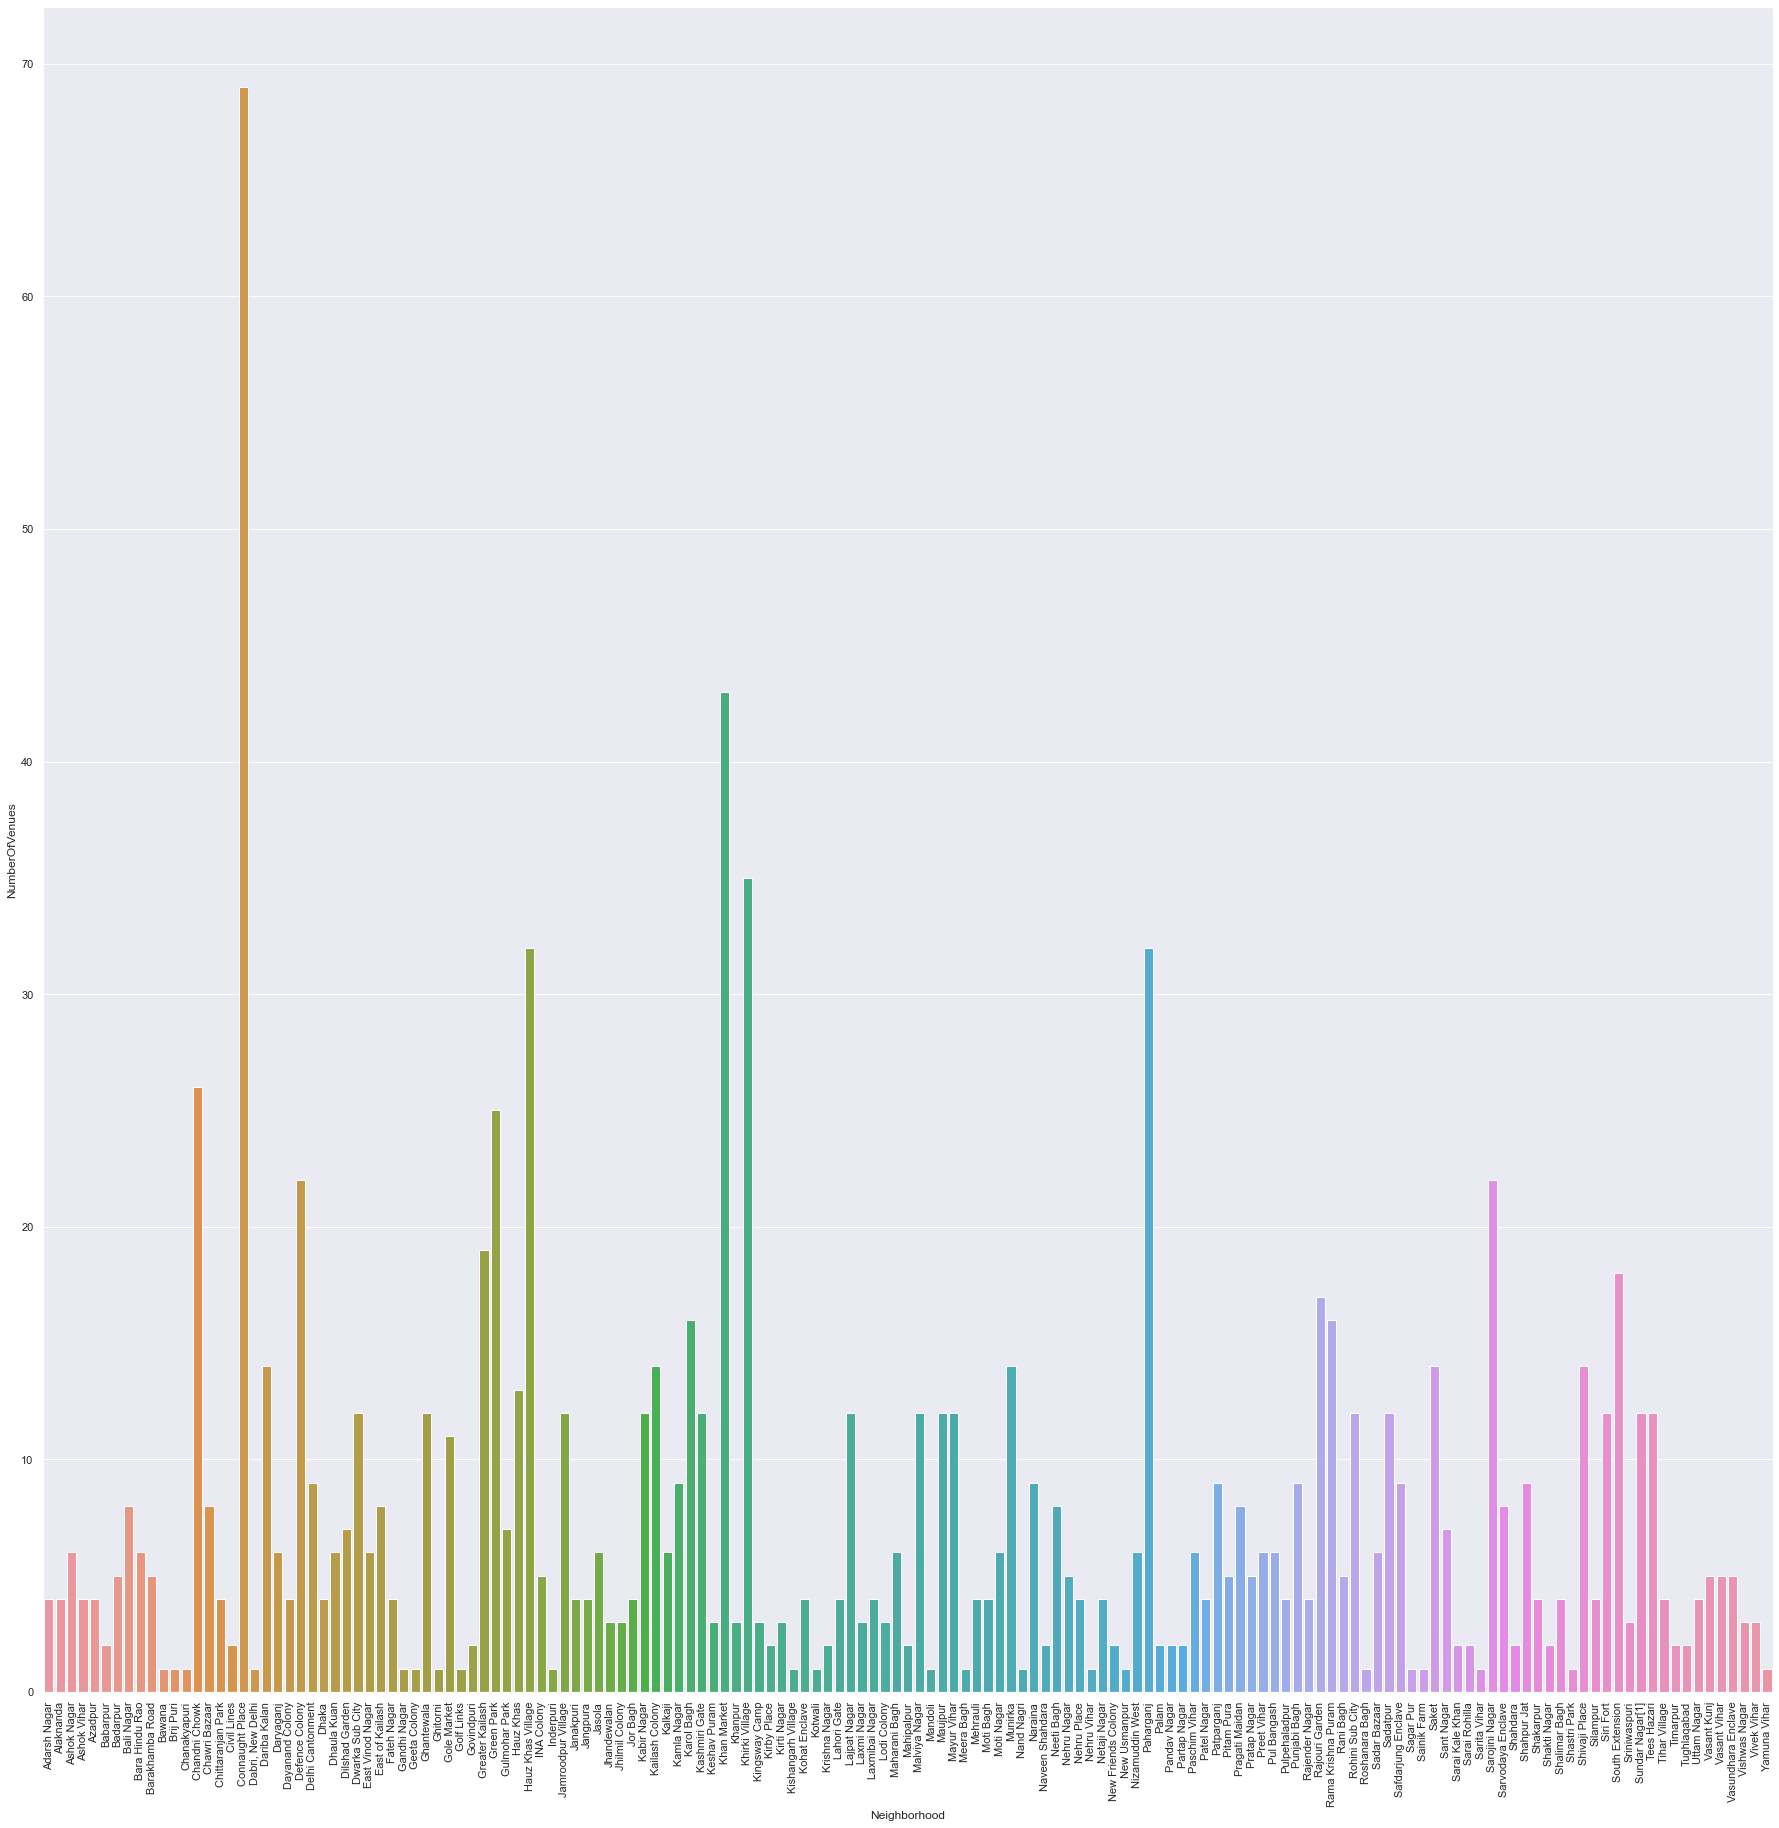

In [15]:
sns.set(rc={'figure.figsize':(31,31)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_delhi_venue_count)
plot.set_xticklabels(individual_delhi_venue_count['Neighborhood'],rotation=90);

##  Analyze Each Neighborhood

In [16]:
# one hot encoding
delhi_onehot = pd.get_dummies(delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighborhood'] = delhi_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [delhi_onehot.columns[-1]] + list(delhi_onehot.columns[:-1])
toronto_onehot = delhi_onehot[fixed_columns]

print(delhi_onehot.shape)
delhi_onehot.head()

(1113, 152)


,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Baby Store,Bakery,Bank,Bar,Bengali Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Burmese Restaurant,Bus Station,Business Service,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fabric Shop,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Light Rail Station,Lighting Store,Lounge,Luggage Store,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Motel,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,North Indian Restaurant,Nudist Beach,Other Great Outdoors,Other Nightlife,Park,Parsi Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Rental Service,Rest Area,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supplement Shop,Tea Room,Temple,Thai Restaurant,Theater,Trail,Train Station,Travel Agency,University,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ashok Vihar,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


__Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category__

In [17]:
delhi_grouped = delhi_onehot.groupby('Neighborhood').mean().reset_index()

print(delhi_grouped.shape)
delhi_grouped.head()

(151, 152)


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Baby Store,Bakery,Bank,Bar,Bengali Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Burmese Restaurant,Bus Station,Business Service,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fabric Shop,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Garden,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Light Rail Station,Lighting Store,Lounge,Luggage Store,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Motel,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Nudist Beach,Other Great Outdoors,Other Nightlife,Park,Parsi Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Rental Service,Rest Area,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Supplement Shop,Tea Room,Temple,Thai Restaurant,Theater,Trail,Train Station,Travel Agency,University,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Adarsh Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,Alaknanda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,Ashok Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.166667,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,

__Let's print each neighborhood along with the top 5 most common venues__

In [18]:
num_top_venues = 5

for hood in delhi_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = delhi_grouped[delhi_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adarsh Nagar----
                venue  freq
0  Light Rail Station  0.25
1   Indian Restaurant  0.25
2      Ice Cream Shop  0.25
3      Sandwich Place  0.25
4                 ATM  0.00


----Alaknanda----
                     venue  freq
0  New American Restaurant  0.25
1              Coffee Shop  0.25
2                   Market  0.25
3               Steakhouse  0.25
4                      ATM  0.00


----Ashok Nagar----
                  venue  freq
0  Fast Food Restaurant  0.33
1        Clothing Store  0.17
2            Food Court  0.17
3        Ice Cream Shop  0.17
4                  Café  0.17


----Ashok Vihar----
                     venue  freq
0  South Indian Restaurant  0.25
1              Pizza Place  0.25
2                   Market  0.25
3                BBQ Joint  0.25
4             Nudist Beach  0.00


----Azadpur----
               venue  freq
0          Pool Hall  0.25
1      Train Station  0.25
2  Indian Restaurant  0.25
3     Clothing Store  0.25
4        Pizza Pla

                  venue  freq
0      Department Store  0.33
1         Women's Store  0.33
2                Market  0.33
3  Other Great Outdoors  0.00
4             Multiplex  0.00


----Khan Market----
                venue  freq
0                Café  0.19
1                 Bar  0.07
2  Chinese Restaurant  0.07
3         Coffee Shop  0.07
4   Indian Restaurant  0.05


----Khanpur----
                  venue  freq
0    Chinese Restaurant  0.67
1                 Trail  0.33
2  Other Great Outdoors  0.00
3             Multiplex  0.00
4                Museum  0.00


----Khirki Village----
               venue  freq
0             Lounge  0.09
1  Indian Restaurant  0.09
2     Clothing Store  0.09
3       Burger Joint  0.09
4      Shopping Mall  0.09


----Kingsway Camp----
               venue  freq
0         Playground  0.33
1  Mobile Phone Shop  0.33
2  Indian Restaurant  0.33
3                ATM  0.00
4       Nudist Beach  0.00


----Kirby Place----
              venue  freq
0  Departme

            venue  freq
0          Lounge  0.19
1           Hotel  0.12
2  Cosmetics Shop  0.06
3       Nightclub  0.06
4  Breakfast Spot  0.06


----Rani Bagh----
               venue  freq
0  Indian Restaurant   0.4
1   Department Store   0.2
2         Donut Shop   0.2
3        Pizza Place   0.2
4       Nudist Beach   0.0


----Rohini Sub City----
            venue  freq
0  Ice Cream Shop  0.08
1  Cosmetics Shop  0.08
2  Clothing Store  0.08
3          Bakery  0.08
4      Food Truck  0.08


----Roshanara Bagh----
                  venue  freq
0         Train Station   1.0
1                   ATM   0.0
2  Other Great Outdoors   0.0
3             Multiplex   0.0
4                Museum   0.0


----Sadar Bazaar----
                  venue  freq
0             Gift Shop  0.33
1     Electronics Store  0.33
2         Metro Station  0.33
3  Other Great Outdoors  0.00
4                Museum  0.00


----Sadatpur----
            venue  freq
0  Ice Cream Shop  0.08
1  Cosmetics Shop  0.08
2  Cl

__Let's put that into a pandas dataframe__


In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

__Now let's create the new dataframe and display the top 10 venues for each neighborhood__

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Indian Restaurant,Ice Cream Shop,Light Rail Station,Sandwich Place,Yoga Studio,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
1,Alaknanda,Market,Coffee Shop,New American Restaurant,Steakhouse,Yoga Studio,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
2,Ashok Nagar,Fast Food Restaurant,Café,Food Court,Ice Cream Shop,Clothing Store,French Restaurant,Food Truck,Food & Drink Shop,Food,Flea Market
3,Ashok Vihar,Pizza Place,Market,South Indian Restaurant,BBQ Joint,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
4,Azadpur,Indian Restaurant,Pool Hall,Train Station,Clothing Store,Yoga Studio,Fabric Shop,Food Truck,Food Court,Food & Drink Shop,Food


__Find out venues including bus or metro station__

In [21]:
df_station = delhi_venues[delhi_venues['Venue Category'].str.contains('Station$') |
                       delhi_venues['Venue Category'].str.contains('^Bus')]
df_station.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Adarsh Nagar,28.720341,77.172661,Adarsh Nagar Metro Station,28.716598,77.170436,Light Rail Station
11,Azadpur,28.712420,77.173111,Vishyavidyalaya Metro Station@Entry gate #1 n ...,28.715596,77.170981,Train Station
14,Dhaka,28.708570,77.205711,Gtb Nagar Railway Station,28.707183,77.206757,Train Station
44,Rohini Sub City,28.642963,77.115875,Tagore Garden Metro Station,28.643731,77.112865,Light Rail Station
46,Rohini Sub City,28.642963,77.115875,Tagore Garden Metro Station,28.644558,77.111843,Train Station


__Insert a new column to represents if there is a station nearby__

In [22]:
cols = df_station['Neighborhood'].unique()
indice = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'].isin(cols)].index.values

neighborhoods_venues_sorted['Station'] = 'No'
neighborhoods_venues_sorted.loc[indice, 'Station'] = 'Yes'

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
0,Adarsh Nagar,Indian Restaurant,Ice Cream Shop,Light Rail Station,Sandwich Place,Yoga Studio,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Yes
1,Alaknanda,Market,Coffee Shop,New American Restaurant,Steakhouse,Yoga Studio,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,No
2,Ashok Nagar,Fast Food Restaurant,Café,Food Court,Ice Cream Shop,Clothing Store,French Restaurant,Food Truck,Food & Drink Shop,Food,Flea Market,No
3,Ashok Vihar,Pizza Place,Market,South Indian Restaurant,BBQ Joint,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,No
4,Azadpur,Indian Restaurant,Pool Hall,Train Station,Clothing Store,Yoga Studio,Fabric Shop,Food Truck,Food Court,Food & Drink Shop,Food,Yes


In [23]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Station']=='Yes']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
0,Adarsh Nagar,Indian Restaurant,Ice Cream Shop,Light Rail Station,Sandwich Place,Yoga Studio,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Yes
4,Azadpur,Indian Restaurant,Pool Hall,Train Station,Clothing Store,Yoga Studio,Fabric Shop,Food Truck,Food Court,Food & Drink Shop,Food,Yes
7,Bali Nagar,Light Rail Station,Pizza Place,Shoe Store,Ice Cream Shop,Dessert Shop,Yoga Studio,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Yes
8,Bara Hindu Rao,Afghan Restaurant,Business Service,Yoga Studio,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Yes
14,Chawri Bazaar,Indian Restaurant,Snack Place,Light Rail Station,Hardware Store,Fast Food Restaurant,Mosque,Donut Shop,Diner,Eastern European Restaurant,Electronics Store,Yes
24,Dhaka,Furniture / Home Store,Pizza Place,Indian Restaurant,Train Station,Fast Food Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Yes
25,Dhaula Kuan,Golf Course,Bakery,Train Station,Flea Market,Garden,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Yes
26,Dilshad Garden,Indian Restaurant,Market,Business Service,Ice Cream Shop,Diner,Metro Station,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Yes
27,Dwarka Sub City,Cosmetics Shop,Light Rail Station,Clothing Store,Food Truck,Burger Joint,Bakery,BBQ Joint,Market,Gym,Train Station,Yes
33,Ghantewala,Cosmetics Shop,Light Rail Station,Clothing Store,Food Truck,Burger Joint,Bakery,BBQ Joint,Market,Gym,Train Station,Yes


## Cluster Neighborhoods
Run *k*-means to cluster the neighborhood into 5 clusters.

In [24]:
# set number of clusters
kclusters = 5

delhi_grouped_clustering = delhi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 3, 3, 0, 3, 3, 3, 3, 3])

 Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [25]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how='inner')

delhi_merged.head() # check the last columns!

,Neighborhood,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
0,Adarsh Nagar,Delhi,28.720341,77.172661,0,Indian Restaurant,Ice Cream Shop,Light Rail Station,Sandwich Place,Yoga Studio,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Yes
1,Ashok Vihar,Delhi,28.690420,77.176064,3,Pizza Place,Market,South Indian Restaurant,BBQ Joint,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,No
2,Azadpur,Delhi,28.712420,77.173111,0,Indian Restaurant,Pool Hall,Train Station,Clothing Store,Yoga Studio,Fabric Shop,Food Truck,Food Court,Food & Drink Shop,Food,Yes
3,Bawana,Delhi,28.797661,77.045258,2,Electronics Store,Yoga Studio,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fast Food Restaurant,No
5,Dhaka,Delhi,28.708570,77.205711,0,Furniture / Home Store,Pizza Place,Indian Restaurant,Train Station,Fast Food Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Yes


Finally, let's visualize the resulting clusters

In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['Latitude'], delhi_merged['Longitude'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

Cluster 1

In [27]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 0, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
0,Delhi,Indian Restaurant,Ice Cream Shop,Light Rail Station,Sandwich Place,Yoga Studio,Fast Food Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Yes
2,Delhi,Indian Restaurant,Pool Hall,Train Station,Clothing Store,Yoga Studio,Fabric Shop,Food Truck,Food Court,Food & Drink Shop,Food,Yes
5,Delhi,Furniture / Home Store,Pizza Place,Indian Restaurant,Train Station,Fast Food Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Yes
9,Delhi,Playground,Indian Restaurant,Mobile Phone Shop,Fast Food Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,No
10,Delhi,Snack Place,Indian Restaurant,Mobile Phone Shop,Gym,Flea Market,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,No
13,Delhi,Indian Restaurant,Snack Place,Hotel,Food,Fast Food Restaurant,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,No
14,Delhi,Indian Restaurant,Department Store,Pizza Place,Donut Shop,Yoga Studio,Flea Market,French Restaurant,Food Truck,Food Court,Food & Drink Shop,No
17,Delhi,Fast Food Restaurant,Convenience Store,Indian Restaurant,Bank,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,No
20,Delhi,Indian Restaurant,Snack Place,Market,Historic Site,Fast Food Restaurant,Hotel,Flea Market,Dessert Shop,French Restaurant,Food Truck,No
58,Delhi,Indian Restaurant,Snack Place,Market,Historic Site,Fast Food Restaurant,Hotel,Flea Market,Dessert Shop,French Restaurant,Food Truck,No


Cluster 2 

In [28]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 1, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
149,Delhi,Gym,Yoga Studio,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fast Food Restaurant,No
150,Delhi,Department Store,Gym,Yoga Studio,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,No


Cluster 3

In [29]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 2, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
3,Delhi,Electronics Store,Yoga Studio,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fast Food Restaurant,No
35,Delhi,Metro Station,Electronics Store,Gift Shop,Yoga Studio,Food,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Yes
65,Delhi,Metro Station,Electronics Store,Gift Shop,Yoga Studio,Food,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Yes
43,Delhi,Cosmetics Shop,Park,Fast Food Restaurant,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,No
92,Delhi,Cosmetics Shop,Electronics Store,Gift Shop,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,No


Cluster 4

In [30]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 3, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
1,Delhi,Pizza Place,Market,South Indian Restaurant,BBQ Joint,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,No
8,Delhi,Women's Store,Market,Department Store,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,No
16,Delhi,Cosmetics Shop,Light Rail Station,Clothing Store,Food Truck,Burger Joint,Bakery,BBQ Joint,Market,Gym,Train Station,Yes
18,Delhi,Baby Store,Yoga Studio,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fast Food Restaurant,No
40,Delhi,Baby Store,Yoga Studio,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fast Food Restaurant,No
19,Delhi,Afghan Restaurant,Business Service,Yoga Studio,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Yes
62,Delhi,Afghan Restaurant,Business Service,Yoga Studio,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Yes
24,Delhi,Cosmetics Shop,Light Rail Station,Clothing Store,Food Truck,Burger Joint,Bakery,BBQ Joint,Market,Gym,Train Station,Yes
26,Delhi,Breakfast Spot,Coffee Shop,Pizza Place,Indian Restaurant,Donut Shop,Miscellaneous Shop,Electronics Store,Yoga Studio,Food,Food Truck,No
27,Delhi,Cosmetics Shop,Light Rail Station,Clothing Store,Food Truck,Burger Joint,Bakery,BBQ Joint,Market,Gym,Train Station,Yes


Cluster 5

In [31]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 4, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Station
54,Delhi,Metro Station,Yoga Studio,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fast Food Restaurant,Yes
94,Delhi,Metro Station,Yoga Studio,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fast Food Restaurant,Yes
56,Delhi,Metro Station,Yoga Studio,Flea Market,Furniture / Home Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Fast Food Restaurant,Yes
